In [1]:
import numpy
from matplotlib import pyplot
import math
%matplotlib inline

In [2]:
x_sources = numpy.loadtxt('../AeroPython/lessons/resources/NACA0012_x.txt')
y_sources = numpy.loadtxt('../AeroPython/lessons/resources/NACA0012_y.txt')
sigmas = numpy.loadtxt('../AeroPython/lessons/resources/NACA0012_sigma.txt')

In [3]:
x = numpy.linspace(-1,2,51)
y = numpy.linspace(-0.5,0.5,51)
X,Y = numpy.meshgrid(x,y)

In [4]:
u = 0
v = 0
psi = 0

for i in range (100):
    u_linshi = sigmas[i]/(2*math.pi) * (X-x_sources[i])/((X-x_sources[i])**2 + (Y - y_sources[i])**2)
    v_linshi = sigmas[i]/(2*math.pi) * (Y-y_sources[i])/((X-x_sources[i])**2 + (Y - y_sources[i])**2)
    psi_linshi = sigmas[i]/(2*math.pi) * numpy.arctan2(Y-y_sources[i], X-x_sources[i])
    
    u = u+u_linshi
    v = v+v_linshi
    psi = psi+psi_linshi

In [5]:
u = u+1
v = v+0
psi = psi+Y

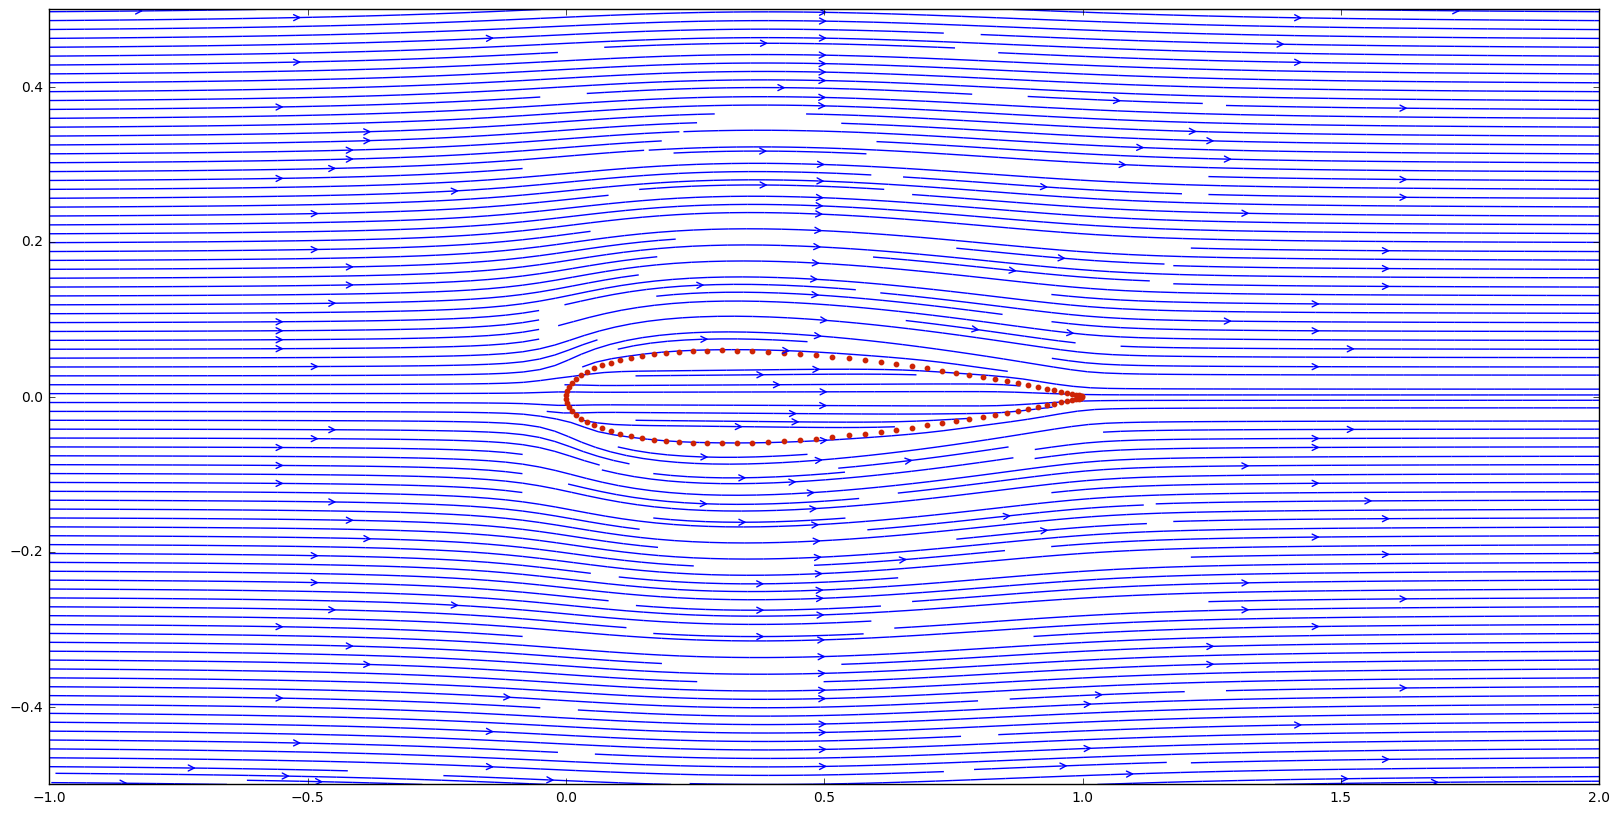

In [31]:
pyplot.figure(figsize=(20,10))
pyplot.streamplot(X, Y, u, v, density=3, linewidth=1, arrowsize=1.5, arrowstyle='->')
pyplot.xlim(-1,2)
pyplot.ylim(-0.5,0.5)
pyplot.scatter(x_sources, y_sources, s=10, color='#CD2305', marker='o', linewidth=1)

In [7]:
u_inf = 1
cp = 1.0 - (u**2+v**2)/u_inf**2

In [9]:
numpy.max(cp)

0.47144366133162408

In [15]:
numpy.where(cp == numpy.max(cp))

(array([25], dtype=int64), array([16], dtype=int64))

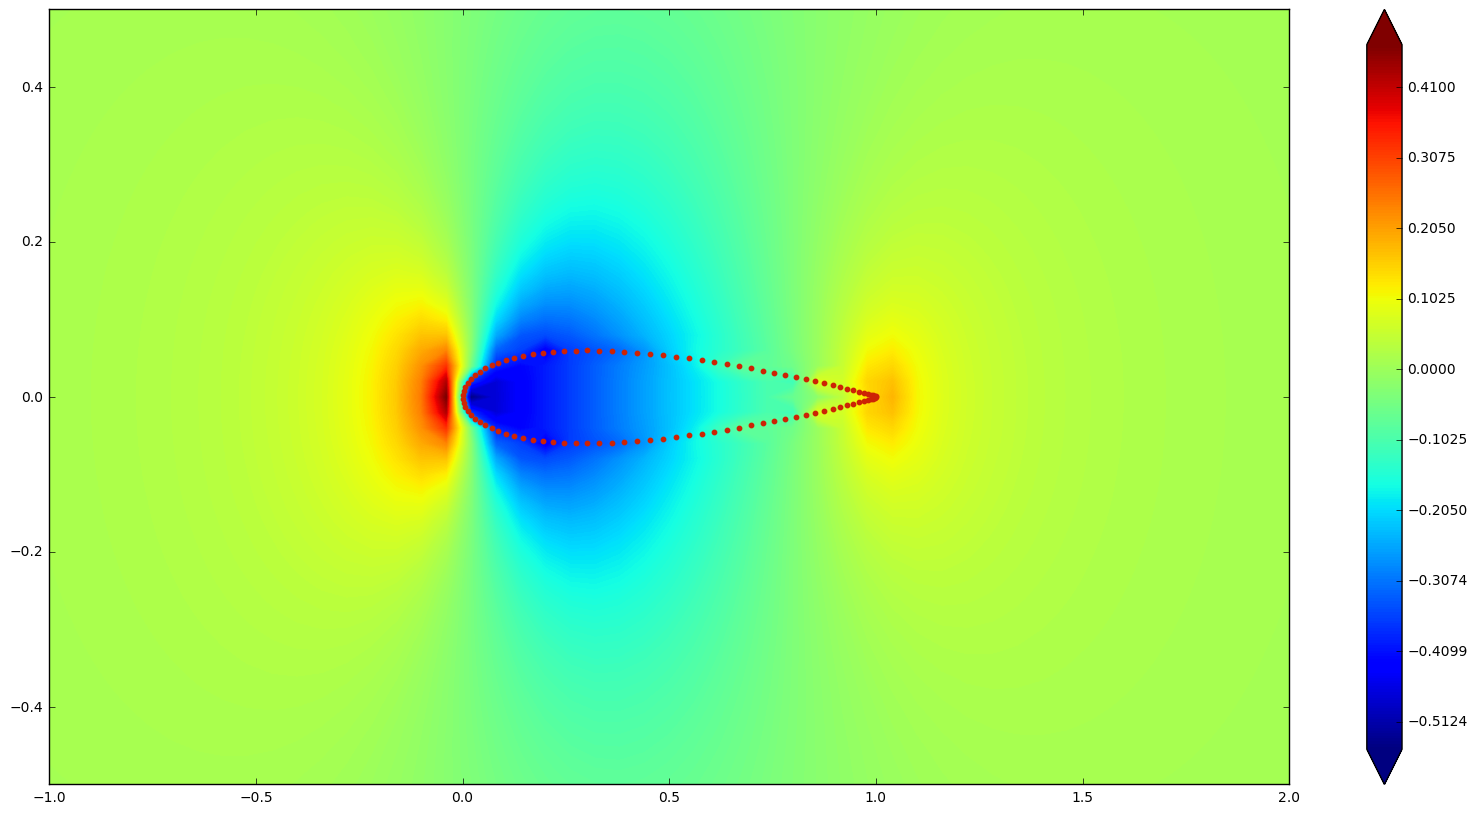

In [24]:
pyplot.figure(figsize=(20,10))
pyplot.xlim(-1,2)
pyplot.ylim(-0.5,0.5)
contf = pyplot.contourf(X, Y, cp, levels=numpy.linspace(numpy.min(cp), numpy.max(cp), 1000), extend='both')
cbar = pyplot.colorbar(contf)
pyplot.scatter(x_sources, y_sources, s=10, color='#CD2305', marker='o', linewidth=1)